In [1]:
#Import libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Change DF display options to show more data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Import the data (the Dominatrices team is only allowed to use 'cheap_train_sample'):

df = pd.read_csv('./data/cheap_train_sample.csv')
preds = pd.read_csv('./data/test_data.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K


In [4]:
df.shape

(6513, 14)

In [5]:
df.info

<bound method DataFrame.info of       age     workclass  fnlwgt      education  education-num       marital-status        occupation    relationship      sex  capital-gain  capital-loss  hours-per-week  native-country    wage
0      56       Private  346033            9th              5             Divorced      Adm-clerical   Not-in-family     Male             0             0              40   United-States   <=50K
1      28       Private   96226        HS-grad              9   Married-civ-spouse      Craft-repair         Husband     Male             0             0              45   United-States   <=50K
2      33       Private  251120      Bachelors             13   Married-civ-spouse             Sales         Husband     Male          7688             0              50   United-States    >50K
3      26       Private  178140      Bachelors             13   Married-civ-spouse     Other-service         Husband     Male             0             0              45   United-States    >50

In [6]:
#Check for any null values:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [7]:
#Check for datatypes
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage              object
dtype: object

In [8]:
#Overview of the dataset with mean/STD values:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,6513.000000,6.513000e+03,6513.000000,6513.000000,6513.000000,6513.000000
mean,38.529556,1.926640e+05,10.068478,1059.200829,92.108092,40.400891
std,13.684351,1.060173e+05,2.589238,7392.040587,413.710886,12.354685
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,27.000000,1.202380e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.815760e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.417530e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#We are predicting whether a person will make more than $50k, or less than $50k
#Let's start with assigning boolean values to the "wage" column where 0 is less than 50k, and 1 is more than 50k
#This will make our data much easier to work with rather than having large, 5-digit numbers:

df['wage'] = df['wage'].map({' <=50K' : 0, ' >50K' : 1})
df['wage'].value_counts()

0    4945
1    1568
Name: wage, dtype: int64

In [10]:
#To get a better understanding of the various datatypes in this data, we'll divide our columns into two distinct groups:
#Continuous data and categorical data
#Data that is continuous: capital-loss, capital-gain, education-num, fnlwgt, age

cont_col = ['age', 'education-num', 'capital-gain', 'capital-loss', 'fnlwgt']

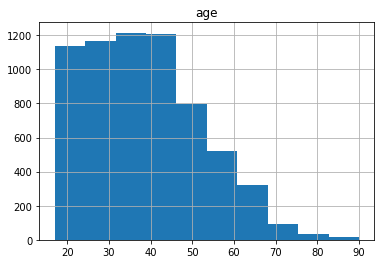

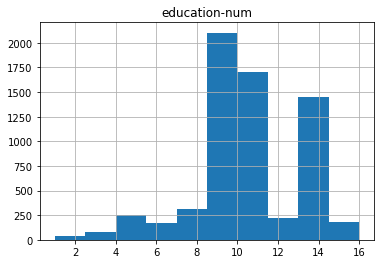

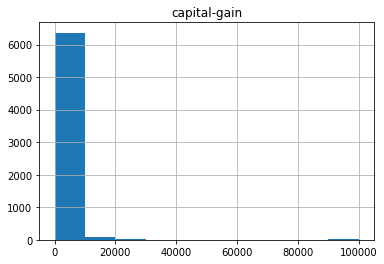

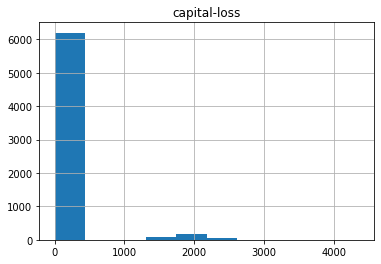

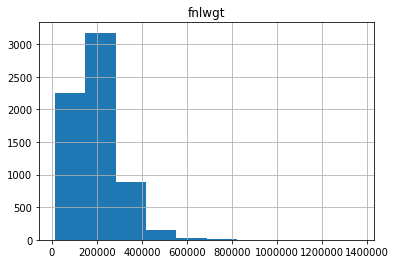

In [11]:
#Let's look to see how the data is distributed:
#There are columns that are right-skewed, and there are outliers with capital-gain, capital-loss, and fnlwgt:

for column in cont_col:
    df.hist(column= column)

In [12]:
df[df['capital-loss'] > 3000]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
1986,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,0
2619,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,0


In [13]:
df[df['fnlwgt'] > 830000]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
450,34,Private,849857,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,Nicaragua,0
605,26,Private,917220,12th,8,Never-married,Transport-moving,Own-child,Male,0,0,40,United-States,0
1990,45,Private,1366120,Assoc-voc,11,Divorced,Other-service,Not-in-family,Female,0,0,8,United-States,0
3488,37,Private,910398,Bachelors,13,Never-married,Sales,Not-in-family,Female,0,0,40,United-States,0
3501,32,?,981628,HS-grad,9,Divorced,?,Unmarried,Male,0,0,40,United-States,0


In [15]:
#Looking through the data, it looks like the outliers are in the columns that have missing data.
#We'll sort through the data where 'workclass', 'country', and 'occupation' are missing

df[(df['workclass'] ==' ?')& (df['native-country'] ==' ?')& (df['occupation'] ==' ?')].index

Int64Index([3282, 4080, 5230, 6282, 6368], dtype='int64')

In [16]:
#Removing the above outliers:
df = df.drop([1986, 2619, 450, 605, 1990, 3488, 3501])

In [17]:
#Removing the outliers fixed some of the issues with our data, but can go even further by logging the age and fnlwgt columns to
#ensure those columns are normally distributed as well:

df['age'] = np.log(df['age'])
df['fnlwgt'] = np.log(df['fnlwgt'])

In [18]:
#Repeating the above for our prediction data:

preds['age'] = np.log(preds['age'])
preds['fnlwgt'] = np.log(preds['fnlwgt'])

In [20]:
#Columns that are categorical data: marital-status, occupation, relationship, sex, native-country, workclass
#At this stage, it's also prudent to drop education since it's essentially the same as education=num, and numerical
#values will be much easier to work with than strings:

df = df.drop(['education'], axis = 1)

#Repeat the above for prediction data:
preds = preds.drop(['education'], axis = 1)

cat_col = ['workclass', 'marital-status', 'occupation', 'relationship', 'sex', 'native-country']

In [21]:
#Checking unique values in our categorical columns:

for col in cat_col:
    print (col, df[col].unique())

workclass [' Private' ' Federal-gov' ' Self-emp-not-inc' ' State-gov'
 ' Self-emp-inc' ' ?' ' Local-gov' ' Without-pay' ' Never-worked']
marital-status [' Divorced' ' Married-civ-spouse' ' Never-married' ' Widowed'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
occupation [' Adm-clerical' ' Craft-repair' ' Sales' ' Other-service'
 ' Exec-managerial' ' Tech-support' ' Prof-specialty' ' Transport-moving'
 ' Handlers-cleaners' ' Farming-fishing' ' ?' ' Machine-op-inspct'
 ' Protective-serv' ' Priv-house-serv' ' Armed-Forces']
relationship [' Not-in-family' ' Husband' ' Wife' ' Unmarried' ' Own-child'
 ' Other-relative']
sex [' Male' ' Female']
native-country [' United-States' ' Germany' ' Iran' ' Philippines' ' Mexico' ' India'
 ' ?' ' Canada' ' South' ' El-Salvador' ' England' ' Peru' ' Japan'
 ' France' ' Columbia' ' Cuba' ' Scotland' ' Vietnam' ' Hong' ' Jamaica'
 ' Puerto-Rico' ' Nicaragua' ' Italy' ' Dominican-Republic' ' Yugoslavia'
 ' Poland' ' Guatemala' ' China' ' H

In [22]:
#Let's dummify all our categorical columns:

df = pd.get_dummies(df, columns = cat_col, drop_first = True)

#Repeating for prediction data as well:
preds = pd.get_dummies(preds, columns = cat_col, drop_first = True)

In [23]:
df.shape

(6506, 81)

In [24]:
#Let's look at correlations, to see what effects wage most:

df.corr()[['wage']].sort_values('wage', ascending = False).head(20)

,wage
wage,1.000000
marital-status_ Married-civ-spouse,0.449058
education-num,0.323444
age,0.275111
hours-per-week,0.255036
sex_ Male,0.229343
occupation_ Exec-managerial,0.227241
capital-gain,0.221318
occupation_ Prof-specialty,0.181716
workclass_ Self-emp-inc,0.154931


In [25]:
#Storing this data so that we can pull it up easier for future sheets:

%store df
%store preds

Stored 'df' (DataFrame)
Stored 'preds' (DataFrame)
